# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\micha\AppData\Local\Temp\ipykernel_5484\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

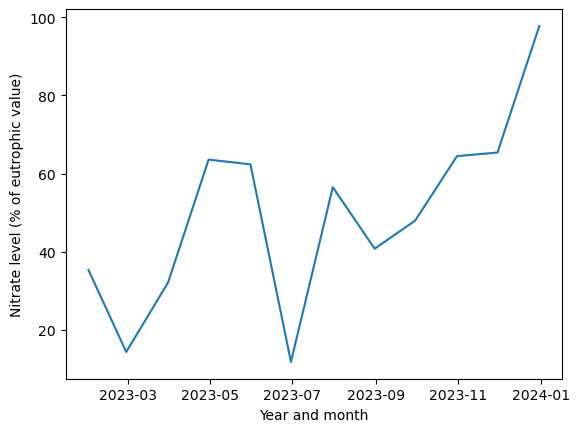

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\micha\AppData\Local\Temp\ipykernel_5484\1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

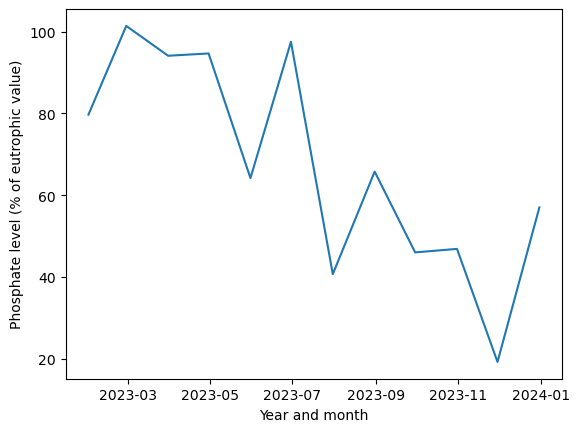

In [4]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

Attribute Suggestions

1. Color: Use a bold or contrasting color for the last three months of data and a muted/grayscale palette for the rest of the data.
2. Size / Line Weight: Thicken the lines or enlarge the data points for the last three months to make them stand out.
3. Position / Layout: Zoom in or position the last three months of data more prominently
4. Data Point Shape: Use different shapes for data points in the last three months (e.g., squares vs. circles).
5. Enclosure: Add a box or shaded background behind the last three months of data to enclose those points visually.

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

In [5]:
df_emissions = pd.read_csv("emissions_high_granularity.csv")
df_fuels = pd.read_csv("all_fuels_data.csv")
df_accidents = pd.read_csv("pipeline_accidents.csv")

### ---- 1. Clean Column Names ---- ###
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()               # Remove leading/trailing spaces
                  .str.lower()               # Lowercase everything
                  .str.replace(" ", "_")     # Replace spaces with underscores
                  .str.replace("-", "_")     # Replace dashes with underscores
    )
    return df

df_emissions = clean_column_names(df_emissions)
df_fuels = clean_column_names(df_fuels)
df_accidents = clean_column_names(df_accidents)

### ---- 2. Handle Dates ---- ###
# Standardize date columns
if "date" in df_fuels.columns:
    df_fuels["date"] = pd.to_datetime(df_fuels["date"], errors="coerce")

if "accident_date/time" in df_accidents.columns:
    df_accidents["accident_date/time"] = pd.to_datetime(df_accidents["accident_date/time"], errors="coerce")

# If 'year' exists in emissions, ensure it's int
if "year" in df_emissions.columns:
    df_emissions["year"] = pd.to_numeric(df_emissions["year"], errors="coerce").astype("Int64")

### ---- 3. Handle Missing Values ---- ###
# Drop rows with missing critical fields
df_emissions.dropna(subset=["year", "total_emissions_mtco2e"], inplace=True)
df_fuels.dropna(subset=["date", "close", "commodity"], inplace=True)
df_accidents.dropna(subset=["accident_date/time"], inplace=True)

# Fill other missing values
df_emissions.fillna(0, inplace=True)
df_fuels.fillna(method="ffill", inplace=True)
df_accidents.fillna(0, inplace=True)

### ---- 4. Data Types Check 
print("Emissions:", df_emissions.dtypes)
print("Fuels:", df_fuels.dtypes)
print("Accidents:", df_accidents.dtypes)

Emissions: year                                    Int64
parent_entity                          object
parent_type                            object
reporting_entity                       object
commodity                              object
production_value                      float64
production_unit                        object
product_emissions_mtco2               float64
flaring_emissions_mtco2               float64
venting_emissions_mtco2               float64
own_fuel_use_emissions_mtco2          float64
fugitive_methane_emissions_mtco2e     float64
fugitive_methane_emissions_mtch4      float64
total_operational_emissions_mtco2e    float64
total_emissions_mtco2e                float64
source                                 object
dtype: object
Fuels: ticker               object
commodity            object
date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: o

C:\Users\micha\AppData\Local\Temp\ipykernel_5484\1753745773.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fuels.fillna(method="ffill", inplace=True)


In [6]:
print(df_emissions.columns.tolist())
print(df_accidents.columns.tolist())

['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity', 'production_value', 'production_unit', 'product_emissions_mtco2', 'flaring_emissions_mtco2', 'venting_emissions_mtco2', 'own_fuel_use_emissions_mtco2', 'fugitive_methane_emissions_mtco2e', 'fugitive_methane_emissions_mtch4', 'total_operational_emissions_mtco2e', 'total_emissions_mtco2e', 'source']
['report_number', 'supplemental_number', 'accident_year', 'accident_date/time', 'operator_id', 'operator_name', 'pipeline/facility_name', 'pipeline_location', 'pipeline_type', 'liquid_type', 'liquid_subtype', 'liquid_name', 'accident_city', 'accident_county', 'accident_state', 'accident_latitude', 'accident_longitude', 'cause_category', 'cause_subcategory', 'unintentional_release_(barrels)', 'intentional_release_(barrels)', 'liquid_recovery_(barrels)', 'net_loss_(barrels)', 'liquid_ignition', 'liquid_explosion', 'pipeline_shutdown', 'shutdown_date/time', 'restart_date/time', 'public_evacuations', 'operator_employee_inju

Emissions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15797 non-null  int64  
 1   parent_entity                       15797 non-null  object 
 2   parent_type                         15797 non-null  object 
 3   reporting_entity                    15797 non-null  object 
 4   commodity                           15797 non-null  object 
 5   production_value                    15797 non-null  float64
 6   production_unit                     15797 non-null  object 
 7   product_emissions_mtco2             15797 non-null  float64
 8   flaring_emissions_mtco2             15797 non-null  float64
 9   venting_emissions_mtco2             15797 non-null  float64
 10  own_fuel_use_emissions_mtco2        15797 non-null  float64
 11  fugitive_methane

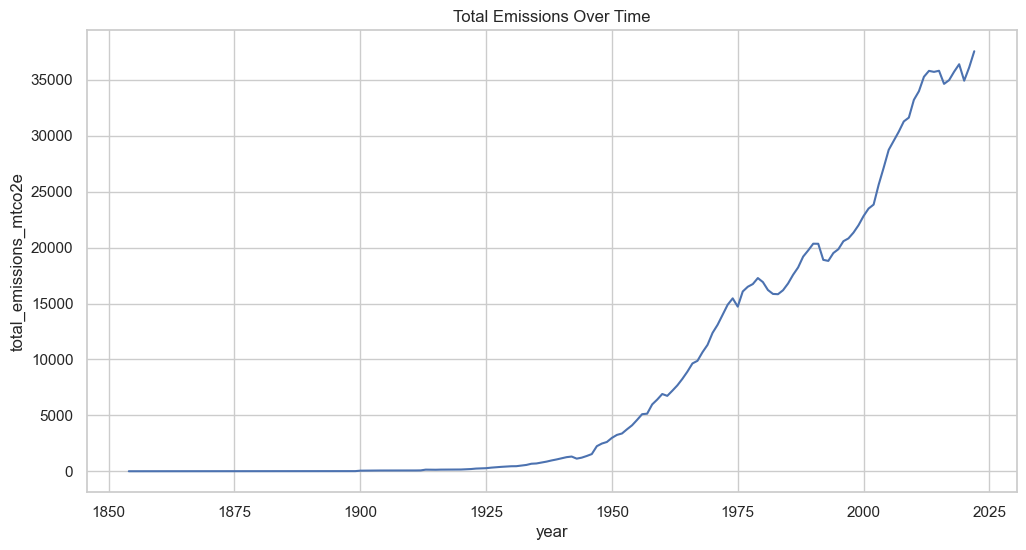

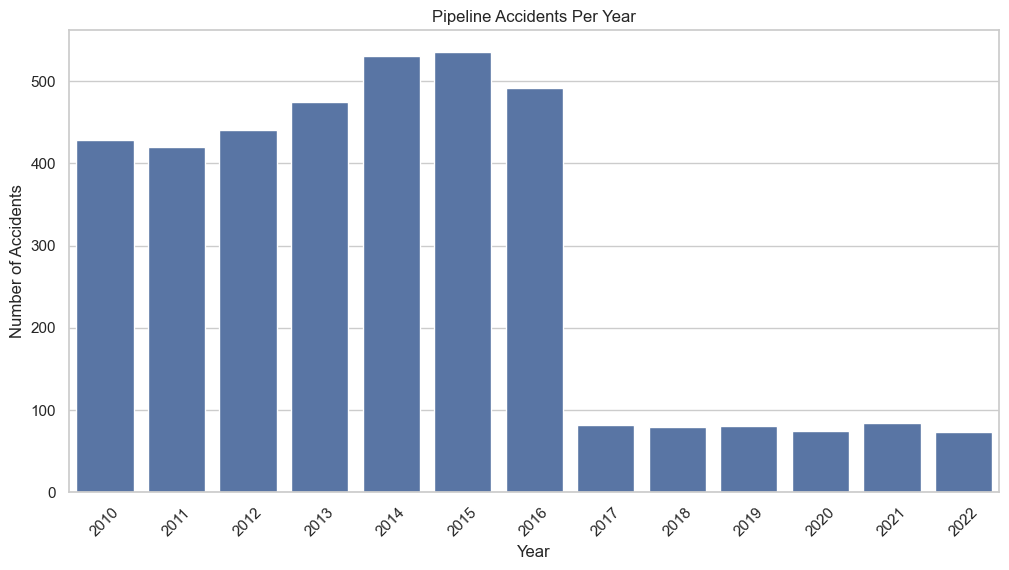

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Plotting Aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ------------------------
# DATA CLEANING FUNCTIONS
# ------------------------

def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace("-", "_")
                  .str.replace(r"[^\w\s]", "", regex=True)
    )
    return df

def convert_date_columns(df, date_cols):
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def convert_numeric(df, numeric_cols):
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def drop_all_null_rows(df):
    return df.dropna(how='all')

def clean_df(df, date_cols=[], numeric_cols=[]):
    df = clean_column_names(df)
    df = convert_date_columns(df, date_cols)
    df = convert_numeric(df, numeric_cols)
    df = drop_all_null_rows(df)
    return df

# ------------------------
# LOAD AND CLEAN DATASETS
# ------------------------

# Load Datasets
emissions = pd.read_csv("emissions_high_granularity.csv")
fuels = pd.read_csv("all_fuels_data.csv")
accidents = pd.read_csv("pipeline_accidents.csv")

# Clean Datasets
emissions = clean_df(emissions, date_cols=[], numeric_cols=["total_emissions_mtco2e"])
fuels = clean_df(fuels, date_cols=[], numeric_cols=["value"])
accidents = clean_df(accidents, date_cols=["accident_date", "incident_date", "report_date"], numeric_cols=["total_cost"])

# Rename for Common Variations
if 'year' not in emissions.columns and 'reporting_year' in emissions.columns:
    emissions = emissions.rename(columns={'reporting_year': 'year'})
if 'year' not in fuels.columns and 'report_year' in fuels.columns:
    fuels = fuels.rename(columns={'report_year': 'year'})
if 'accident_date' in accidents.columns:
    accidents['accident_year'] = accidents['accident_date'].dt.year

# ------------------------
# BASIC INFO
# ------------------------
print("Emissions Data Overview:")
print(emissions.info())
print(emissions.describe(include='all'))

print("\nFuels Data Overview:")
print(fuels.info())
print(fuels.describe(include='all'))

print("\nPipeline Accidents Data Overview:")
print(accidents.info())
print(accidents.describe(include='all'))

# ------------------------
# NULL VALUES
# ------------------------
print("\nMissing values in Emissions:\n", emissions.isnull().sum())
print("\nMissing values in Fuels:\n", fuels.isnull().sum())
print("\nMissing values in Accidents:\n", accidents.isnull().sum())

# ------------------------
# VALUE COUNTS / UNIQUES
# ------------------------
print("\nUnique emitters:\n", emissions['entity'].nunique() if 'entity' in emissions.columns else "Missing 'entity'")
print("\nUnique fuel types:\n", fuels['msn'].nunique() if 'msn' in fuels.columns else "Missing 'msn'")
print("\nAccident causes:\n", accidents['accident_type'].value_counts(dropna=False) if 'accident_type' in accidents.columns else "Missing 'accident_type'")

# ------------------------
# TIME SERIES PLOTS
# ------------------------
if {'year', 'total_emissions_mtco2e'}.issubset(emissions.columns):
    emissions_yearly = emissions.groupby("year")["total_emissions_mtco2e"].sum().reset_index()
    sns.lineplot(data=emissions_yearly, x="year", y="total_emissions_mtco2e")
    plt.title("Total Emissions Over Time")
    plt.show()

if {'year', 'value'}.issubset(fuels.columns):
    fuels_yearly = fuels.groupby("year")["value"].sum().reset_index()
    sns.lineplot(data=fuels_yearly, x="year", y="value")
    plt.title("Total Fuel Production Over Time")
    plt.show()

if 'accident_year' in accidents.columns:
    accident_counts = accidents['accident_year'].value_counts().sort_index()
    sns.barplot(x=accident_counts.index, y=accident_counts.values)
    plt.title("Pipeline Accidents Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Accidents")
    plt.xticks(rotation=45)
    plt.show()

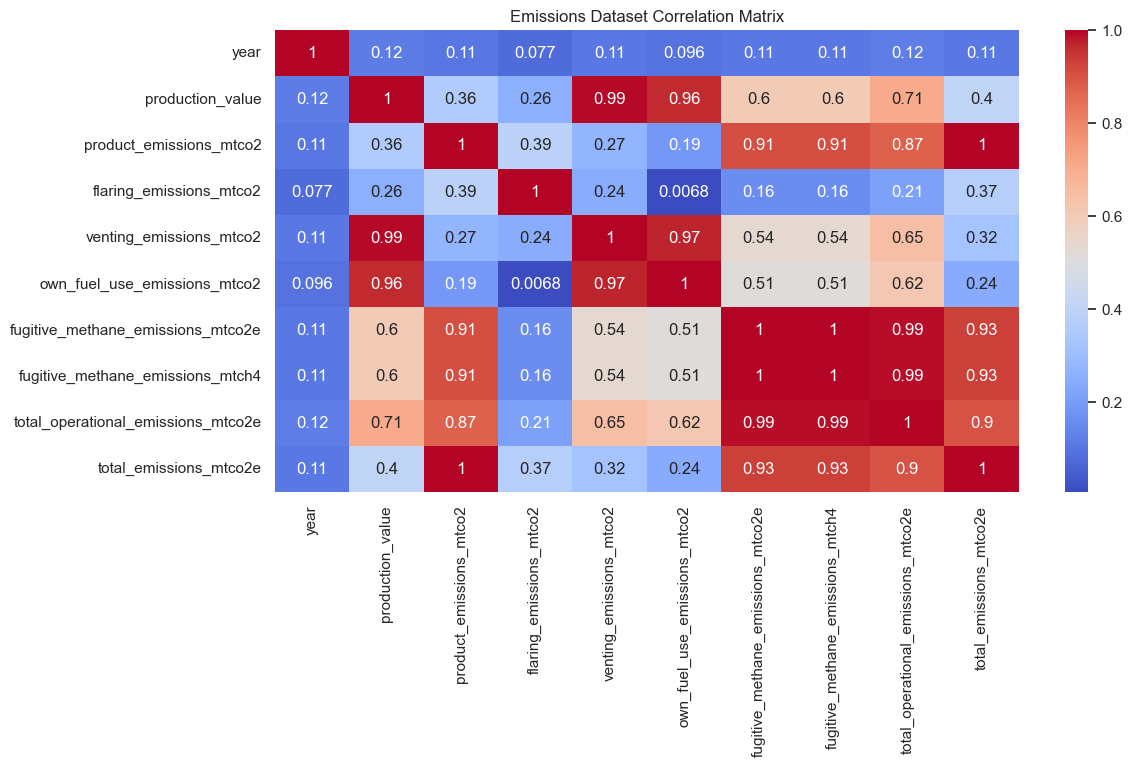

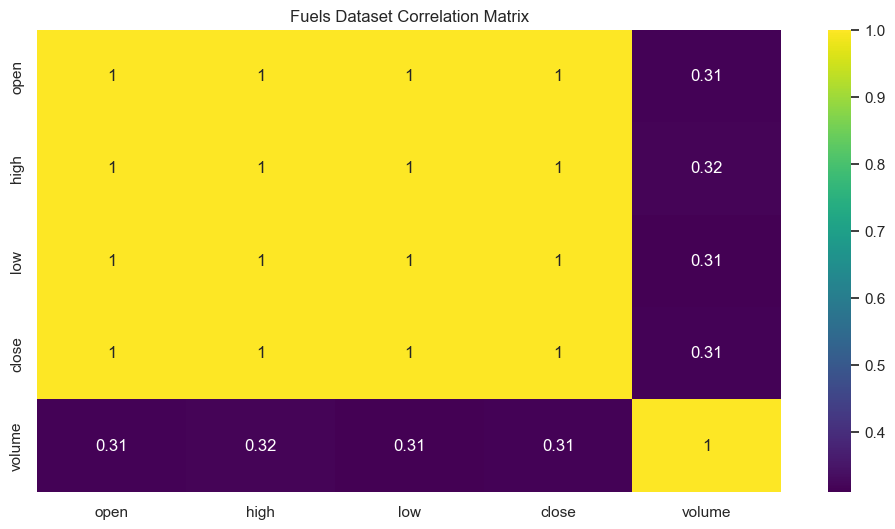

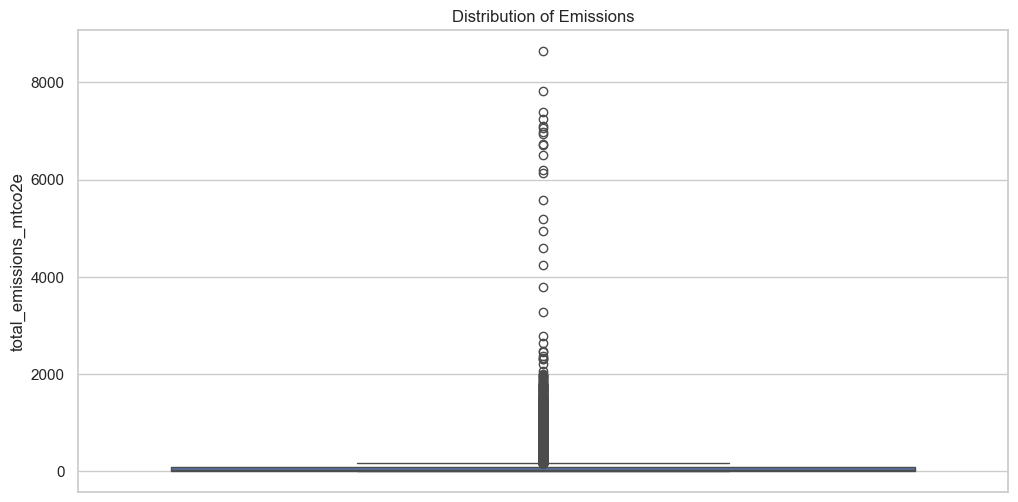

In [8]:
# ------------------------
# CORRELATION MATRIX
# ------------------------
if emissions.select_dtypes(include='number').shape[1] > 1:
    sns.heatmap(emissions.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
    plt.title("Emissions Dataset Correlation Matrix")
    plt.show()

if fuels.select_dtypes(include='number').shape[1] > 1:
    sns.heatmap(fuels.select_dtypes(include='number').corr(), annot=True, cmap='viridis')
    plt.title("Fuels Dataset Correlation Matrix")
    plt.show()

# ------------------------
# OUTLIER DETECTION (BOXPLOTS)
# ------------------------
if 'total_emissions_mtco2e' in emissions.columns:
    sns.boxplot(data=emissions, y='total_emissions_mtco2e')
    plt.title("Distribution of Emissions")
    plt.show()

if 'value' in fuels.columns:
    sns.boxplot(data=fuels, y='value')
    plt.title("Distribution of Fuel Values")
    plt.show()

if 'total_cost' in accidents.columns:
    sns.boxplot(data=accidents, y='total_cost')
    plt.title("Distribution of Pipeline Accident Costs")
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()              
                  .str.lower()               
                  .str.replace(" ", "_")     
                  .str.replace("-", "_")
    )
    return df

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Load your datasets
df_emissions = pd.read_csv("emissions_high_granularity.csv")
df_fuels = pd.read_csv("all_fuels_data.csv")
df_accidents = pd.read_csv("pipeline_accidents.csv")

# Clean column names
df_emissions = clean_column_names(df_emissions)
df_fuels = clean_column_names(df_fuels)
df_accidents = clean_column_names(df_accidents)

### 1. Emissions by Year ###
def plot_emissions_by_year(df):
    emissions_by_year = df.groupby("year")["total_emissions_mtco2e"].sum().reset_index()
    sns.lineplot(data=emissions_by_year, x="year", y="total_emissions_mtco2e")
    plt.title("Total CO₂ Emissions by Year")
    plt.xlabel("Year")
    plt.ylabel("Total MtCO₂e Emissions")
    plt.tight_layout()
    plt.show()

### 2. Fuel Prices Over Time ###
def plot_fuel_prices(df):
    df["date"] = pd.to_datetime(df["date"])
    sns.lineplot(data=df, x="date", y="close", hue="commodity")
    plt.title("Fuels Futures Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD/unit)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Pipeline Accidents Per Year ###
def plot_pipeline_accidents(df):
    df["accident_year"] = pd.to_datetime(df["accident_year"]).dt.year
    accidents_per_year = df.groupby("accident_year").size().reset_index(name="count")
    sns.barplot(data=accidents_per_year, x="accident_year", y="count", color="crimson")
    plt.title("Pipeline Accidents Per Year")
    plt.xlabel("Year")
    plt.ylabel("Accident Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### 4. Emissions vs Fuel Prices ###
def plot_emissions_vs_price(df_emissions, df_fuels):
    df_fuels["year"] = pd.to_datetime(df_fuels["date"]).dt.year
    df_merge = pd.merge(df_fuels, df_emissions, on="year", how="inner")
    sns.scatterplot(data=df_merge, x="close", y="total_emissions_mtco2e", hue="ticker", alpha=0.6)
    plt.title("Fuel Prices vs CO₂ Emissions")
    plt.xlabel("Price")
    plt.ylabel("CO₂ Emissions")
    plt.tight_layout()
    plt.show()


C:\Users\micha\AppData\Local\Temp\ipykernel_5484\1290296916.py:34: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


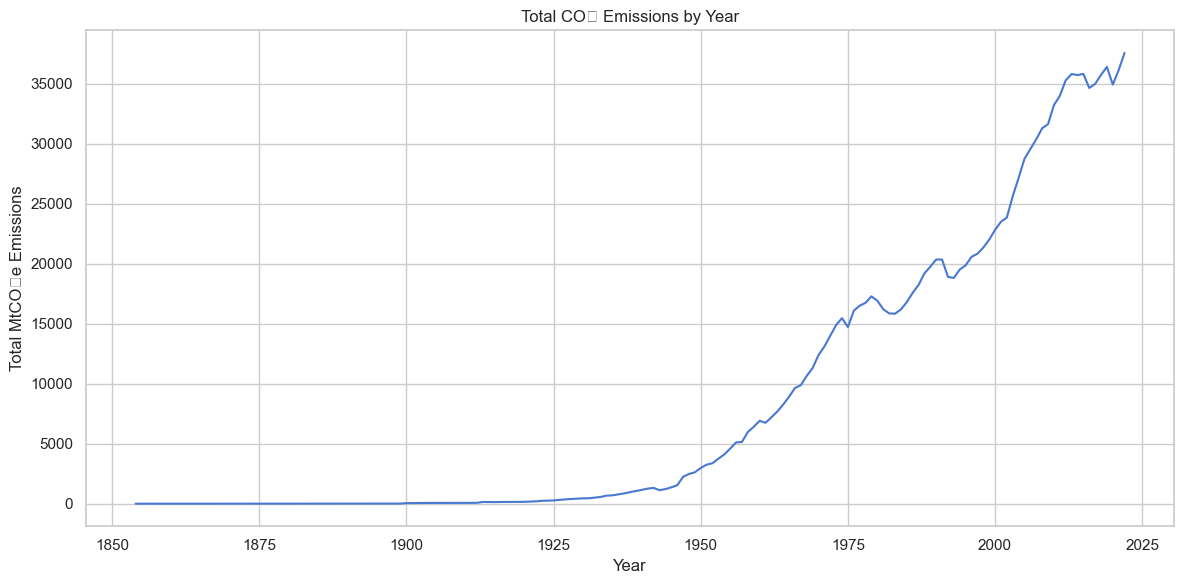

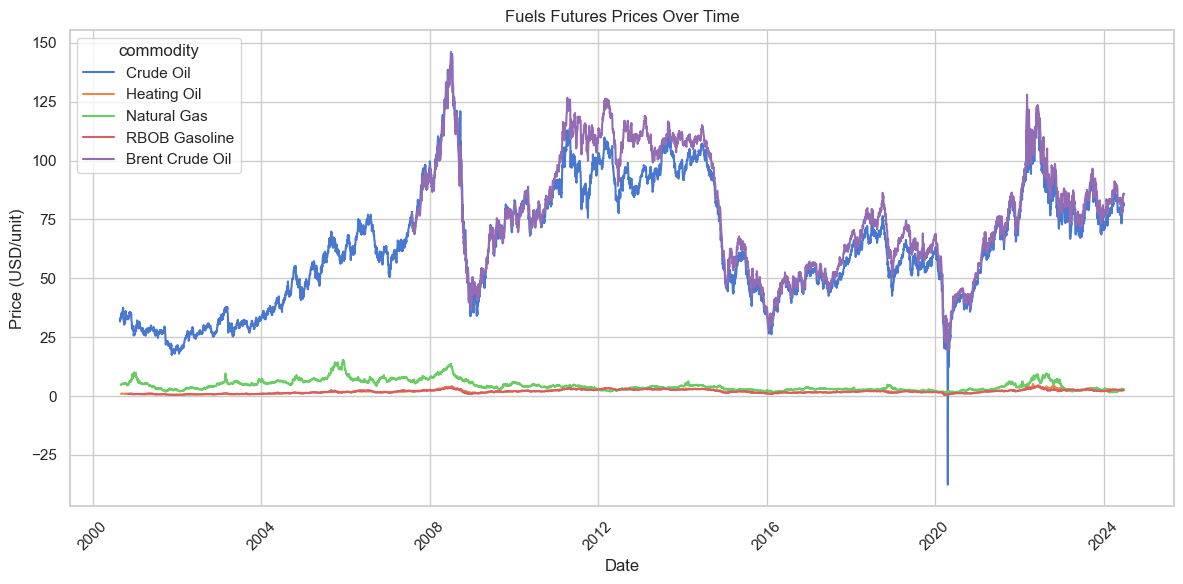

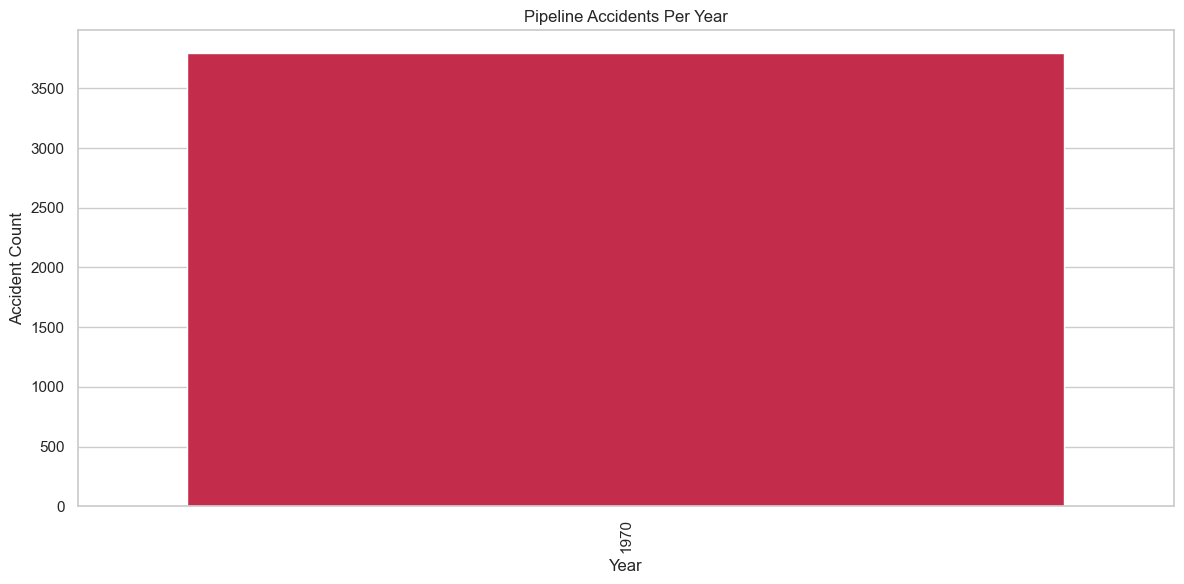

C:\Users\micha\AppData\Local\Temp\ipykernel_5484\1290296916.py:68: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\micha\AppData\Local\Temp\ipykernel_5484\1290296916.py:68: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


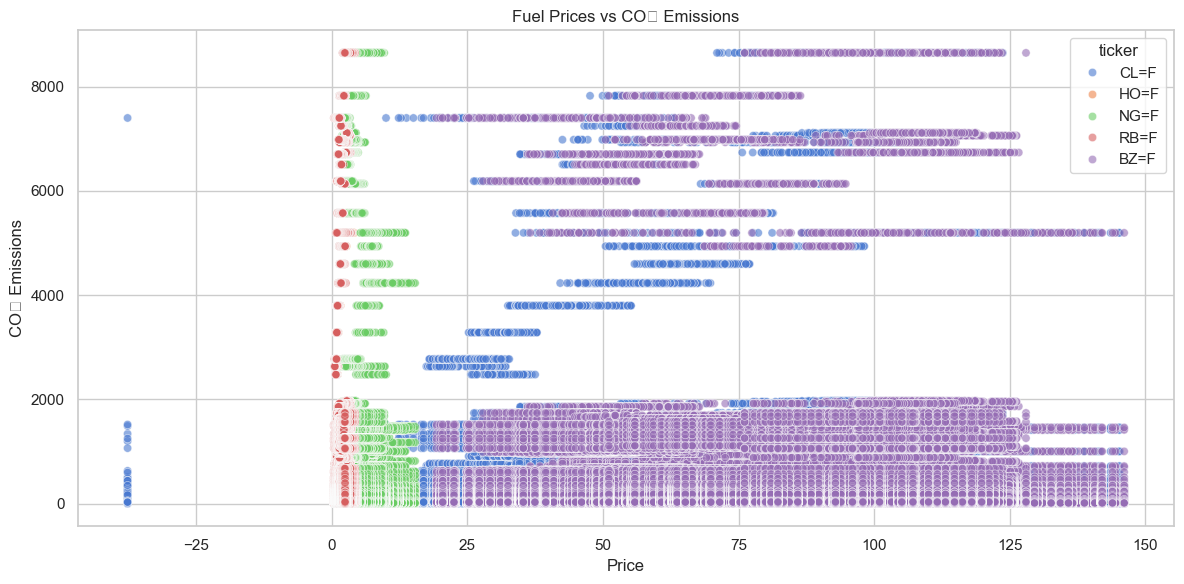

In [10]:
plot_emissions_by_year(df_emissions)
plot_fuel_prices(df_fuels)
plot_pipeline_accidents(df_accidents)
plot_emissions_vs_price(df_emissions, df_fuels)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

top_emitters = emissions[['parent_entity', 'total_emissions_mtco2e']].sort_values(
    by='total_emissions_mtco2e', ascending=False).head(10)

# Define which company to highlight
highlight = "China (Coal)"

# Create a hue column for coloring
top_emitters['highlight'] = top_emitters['parent_entity'].apply(
    lambda x: 'Highlighted' if x == highlight else 'Other'
)

# Set custom palette
palette = {'Highlighted': 'steelblue', 'Other': 'lightgray'}

# Plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_emitters,
    y='parent_entity',
    x='total_emissions_mtco2e',
    hue='highlight',
    dodge=False,
    palette=palette,
    legend=False  # Hide legend unless you want it
)

plt.title(f"Top 10 Emitters (Highlighting {highlight})", fontsize=14)
plt.xlabel("Total Emissions (MtCO₂e)")
plt.ylabel("")

# Add text label to highlighted bar
highlight_value = top_emitters[top_emitters['parent_entity'] == highlight]['total_emissions_mtco2e'].values[0]
plt.text(highlight_value + 1, top_emitters[top_emitters['parent_entity'] == highlight].index[0],
         f"{highlight_value:.1f}", va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_5484\57078205.py:40: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\micha\AppData\Local\Temp\ipykernel_5484\57078205.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 1007x1692124 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [21]:
print(top_emitters['parent_entity'].unique())

['China (Coal)']
